In [81]:
import pandas as pd
import seaborn as sn
import numpy as np
import random as rn

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

plt.style.use('ggplot')

In [24]:
df = pd.read_excel(
    io='dataset/Coffee Shop Sales.xlsx',
    engine='openpyxl'
)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [26]:
df['time_as_datetime'] = pd.to_datetime(
    df['transaction_time'].astype(str), format='%H:%M:%S'
)

In [27]:
df = df.drop(columns='transaction_time')

In [28]:
# Defining brand-new column for storing revenue. 
df['revenue'] = df['transaction_qty'] * df['unit_price']

# Defining Day Column
df['day'] = df['transaction_date'].dt.day

# Defining Month Column
df['month'] = df['transaction_date'].dt.month

## Analysis

### I. What are the top selling product categories by total revenue?

In [18]:
product_categories = df.groupby('product_category') \
                       .agg(total_revenue=('revenue', 'sum')) \
                       .sort_values(by='total_revenue') \
                       .reset_index()

In [19]:
product_categories

,product_category,total_revenue
0,Packaged Chocolate,4407.64
1,Flavours,8408.80
2,Loose Tea,11213.60
3,Branded,13607.00
4,Coffee beans,40085.25
5,Drinking Chocolate,72416.00
6,Bakery,82315.64
7,Tea,196405.95
8,Coffee,269952.45


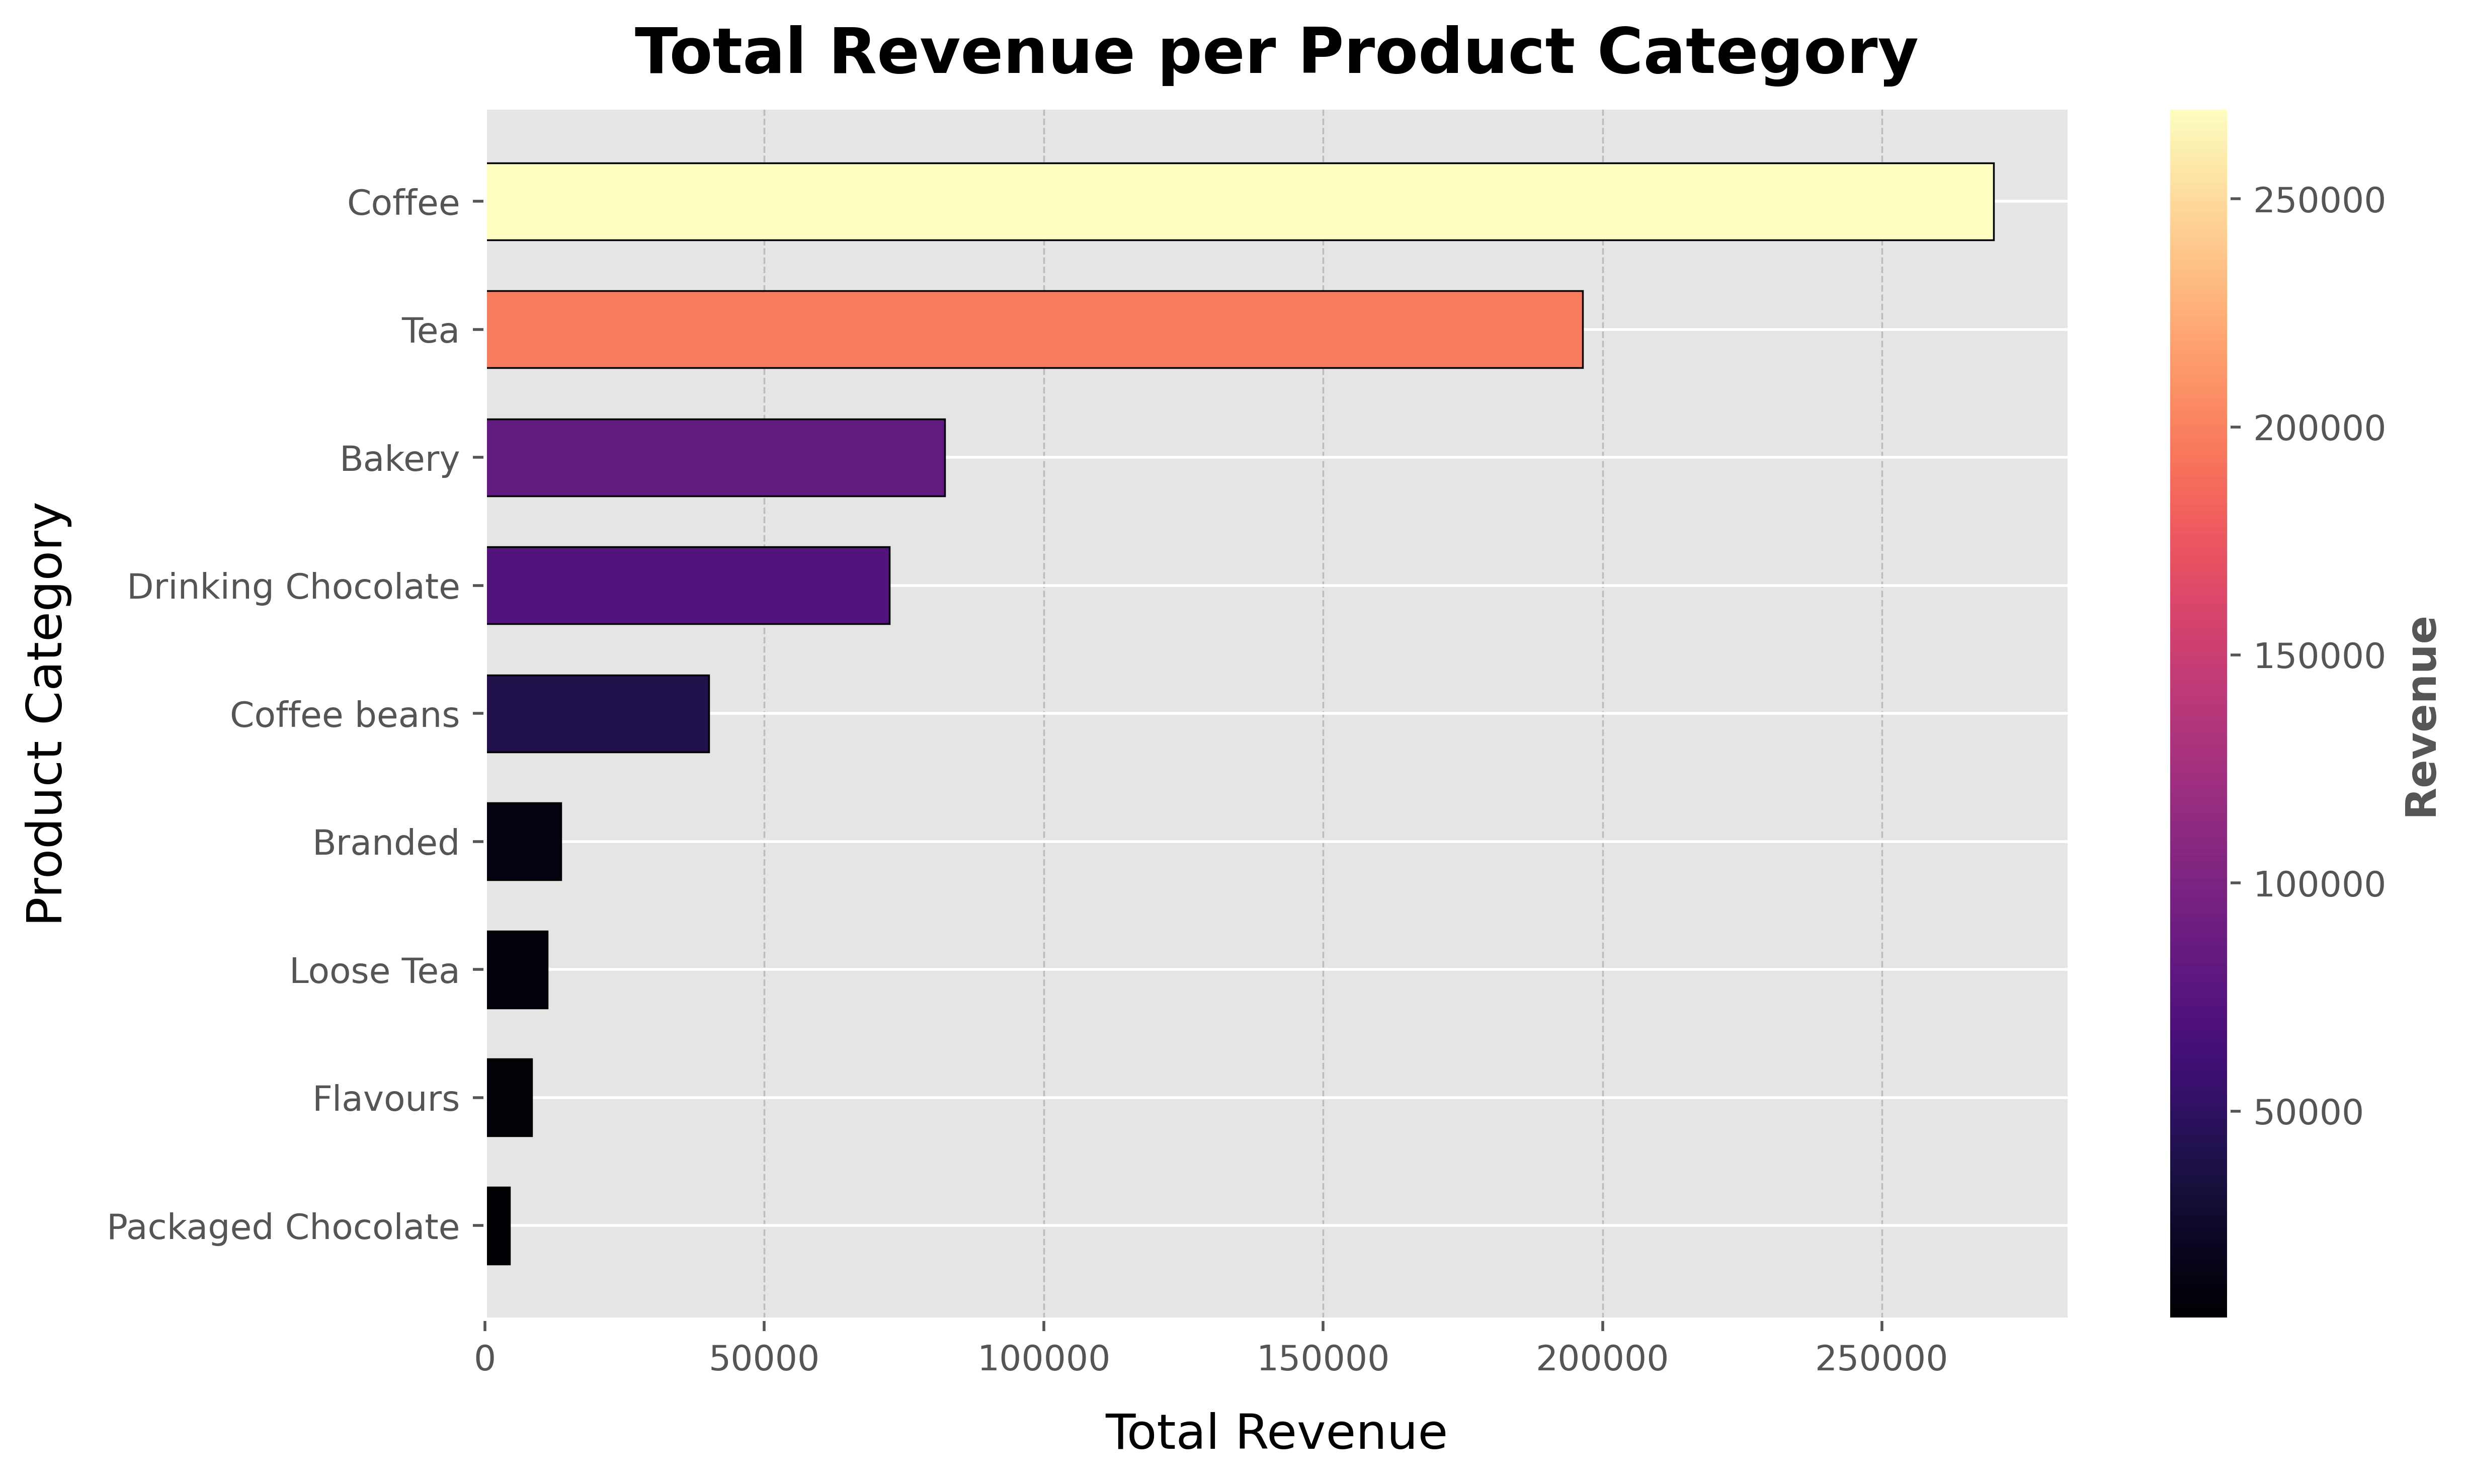

In [25]:
# Normalizing the data for colormap (0 to 1)
norm = mcolors.Normalize(
    vmin=product_categories['total_revenue'].min(),
    vmax=product_categories['total_revenue'].max()
)
cmap = plt.cm.magma
colors = cmap(norm(product_categories['total_revenue']))

fig, ax = plt.subplots(
    figsize=(10, 6),
    dpi=500,
)

ax.barh(
    y=product_categories['product_category'],
    width=product_categories['total_revenue'],
    height=0.6,
    color=colors,
    edgecolor='black'
)

ax.set_title(
    label='Total Revenue per Product Category',
    fontsize=18,
    fontweight='bold',
    color='black',
    loc='center',
    pad=10
)

ax.set_xlabel(
    xlabel='Total Revenue',
    fontsize=14,
    color='black',
    labelpad=10,
    loc='center'
)

ax.set_ylabel(
    ylabel='Product Category',
    fontsize=14,
    color='black',
    labelpad=10,
    loc='center'
)


########### Configuring Grid For Each Axis ###########
ax.xaxis.grid(
    visible=True, 
    which='major', 
    color='gray', 
    linestyle='--', 
    linewidth=0.5, 
    alpha=0.4
)
ax.yaxis.grid(
    visible=True, 
    which='minor', 
    color='gray', 
    linestyle='--', 
    linewidth=0.4, 
    alpha=0.3
)



# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(
    label='Revenue',
    fontsize=12,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

### II. How does daily revenue trend over the first quarter (Jan-Mar 2023)? 

In [34]:
first_quarter = df[
    (df['transaction_date'] >= '01.01.2023')
    &
    (df['transaction_date'] <= '03.01.2023')
]

In [37]:
first_quarter_analysis = first_quarter.groupby('transaction_date') \
                                      .agg(total_revenue=('revenue', 'sum')) \
                                      .reset_index()

first_quarter_analysis.head()

,transaction_date,total_revenue
0,2023-01-01,2508.20
1,2023-01-02,2403.35
2,2023-01-03,2565.00
3,2023-01-04,2220.10
4,2023-01-05,2418.85


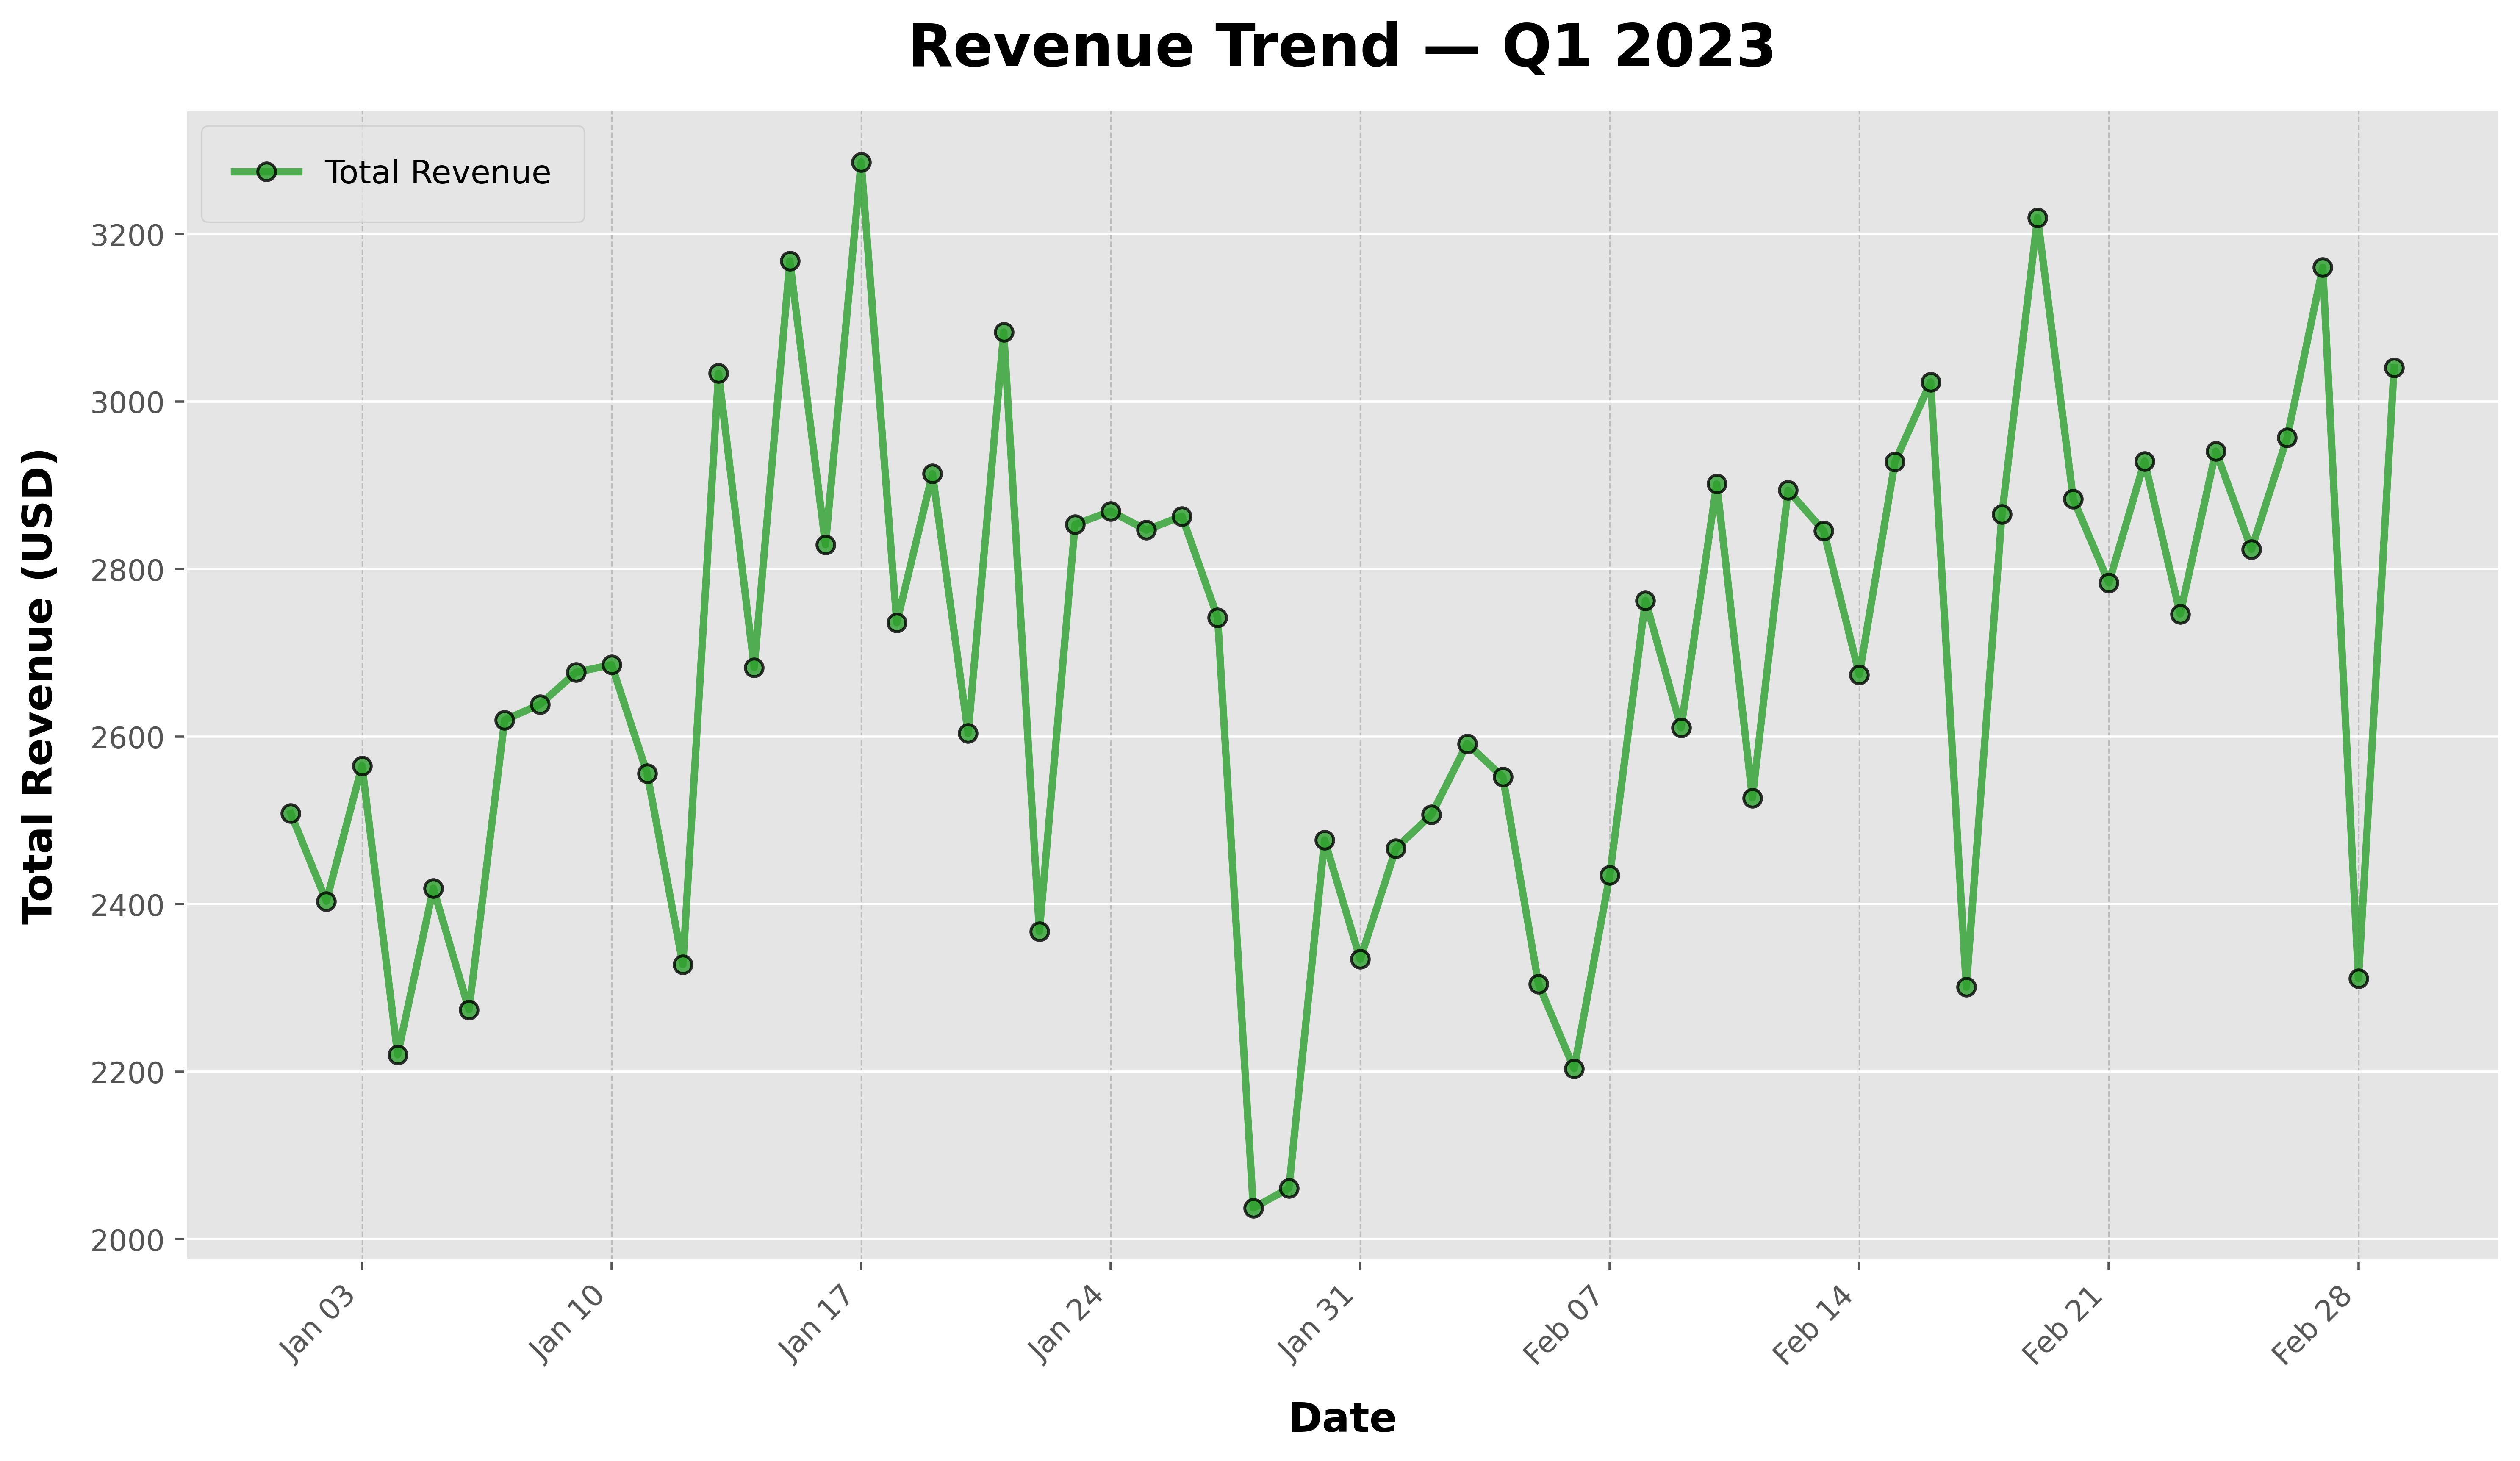

In [47]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(12, 7),
    dpi=500
)

ax.plot(
    first_quarter_analysis['transaction_date'],
    first_quarter_analysis['total_revenue'],
    color='#2ca02c',                     
    linestyle='-',
    linewidth=2.5,
    marker='o',
    markersize=6,
    markerfacecolor='#2ca02c',
    markeredgecolor='black',
    alpha=0.8,
    label='Total Revenue'
)

ax.set_title(
    "Revenue Trend — Q1 2023",
    fontsize=20,
    fontweight='bold',
    color='black',
    pad=15
)

ax.set_xlabel(
    "Date",
    fontsize=14,
    fontweight='bold',
    color='black',
    labelpad=10
)

ax.set_ylabel(
    "Total Revenue (USD)",
    fontsize=14,
    fontweight='bold',
    color='black',
    labelpad=10
)

########### Formatting x-axis with better date formatting ###########
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Weekly ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))    # e.g., Jan 01
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

########### Configuring Grid For Each Axis |###########
ax.xaxis.grid(
    visible=True, 
    which='major', 
    color='gray', 
    linestyle='--', 
    linewidth=0.5, 
    alpha=0.4
)
ax.yaxis.grid(
    visible=True, 
    which='minor', 
    color='gray', 
    linestyle='--', 
    linewidth=0.4, 
    alpha=0.3
)

plt.xticks(rotation=45)

########### Configurting Legend ###########
ax.legend(
    fontsize=11,
    loc='upper left',
    frameon=True,
    fancybox=True,
    framealpha=0.8,
    shadow=False,
    borderpad=1
)

plt.tight_layout()
plt.show()

### III. Which store location is the highest performer in terms of generated revenue?

In [50]:
df['store_location'].unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

In [53]:
location_revenue = df.groupby('store_location') \
                     .agg(total_revenue=('revenue', 'sum')) \
                     .reset_index()

location_revenue.head()

,store_location,total_revenue
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


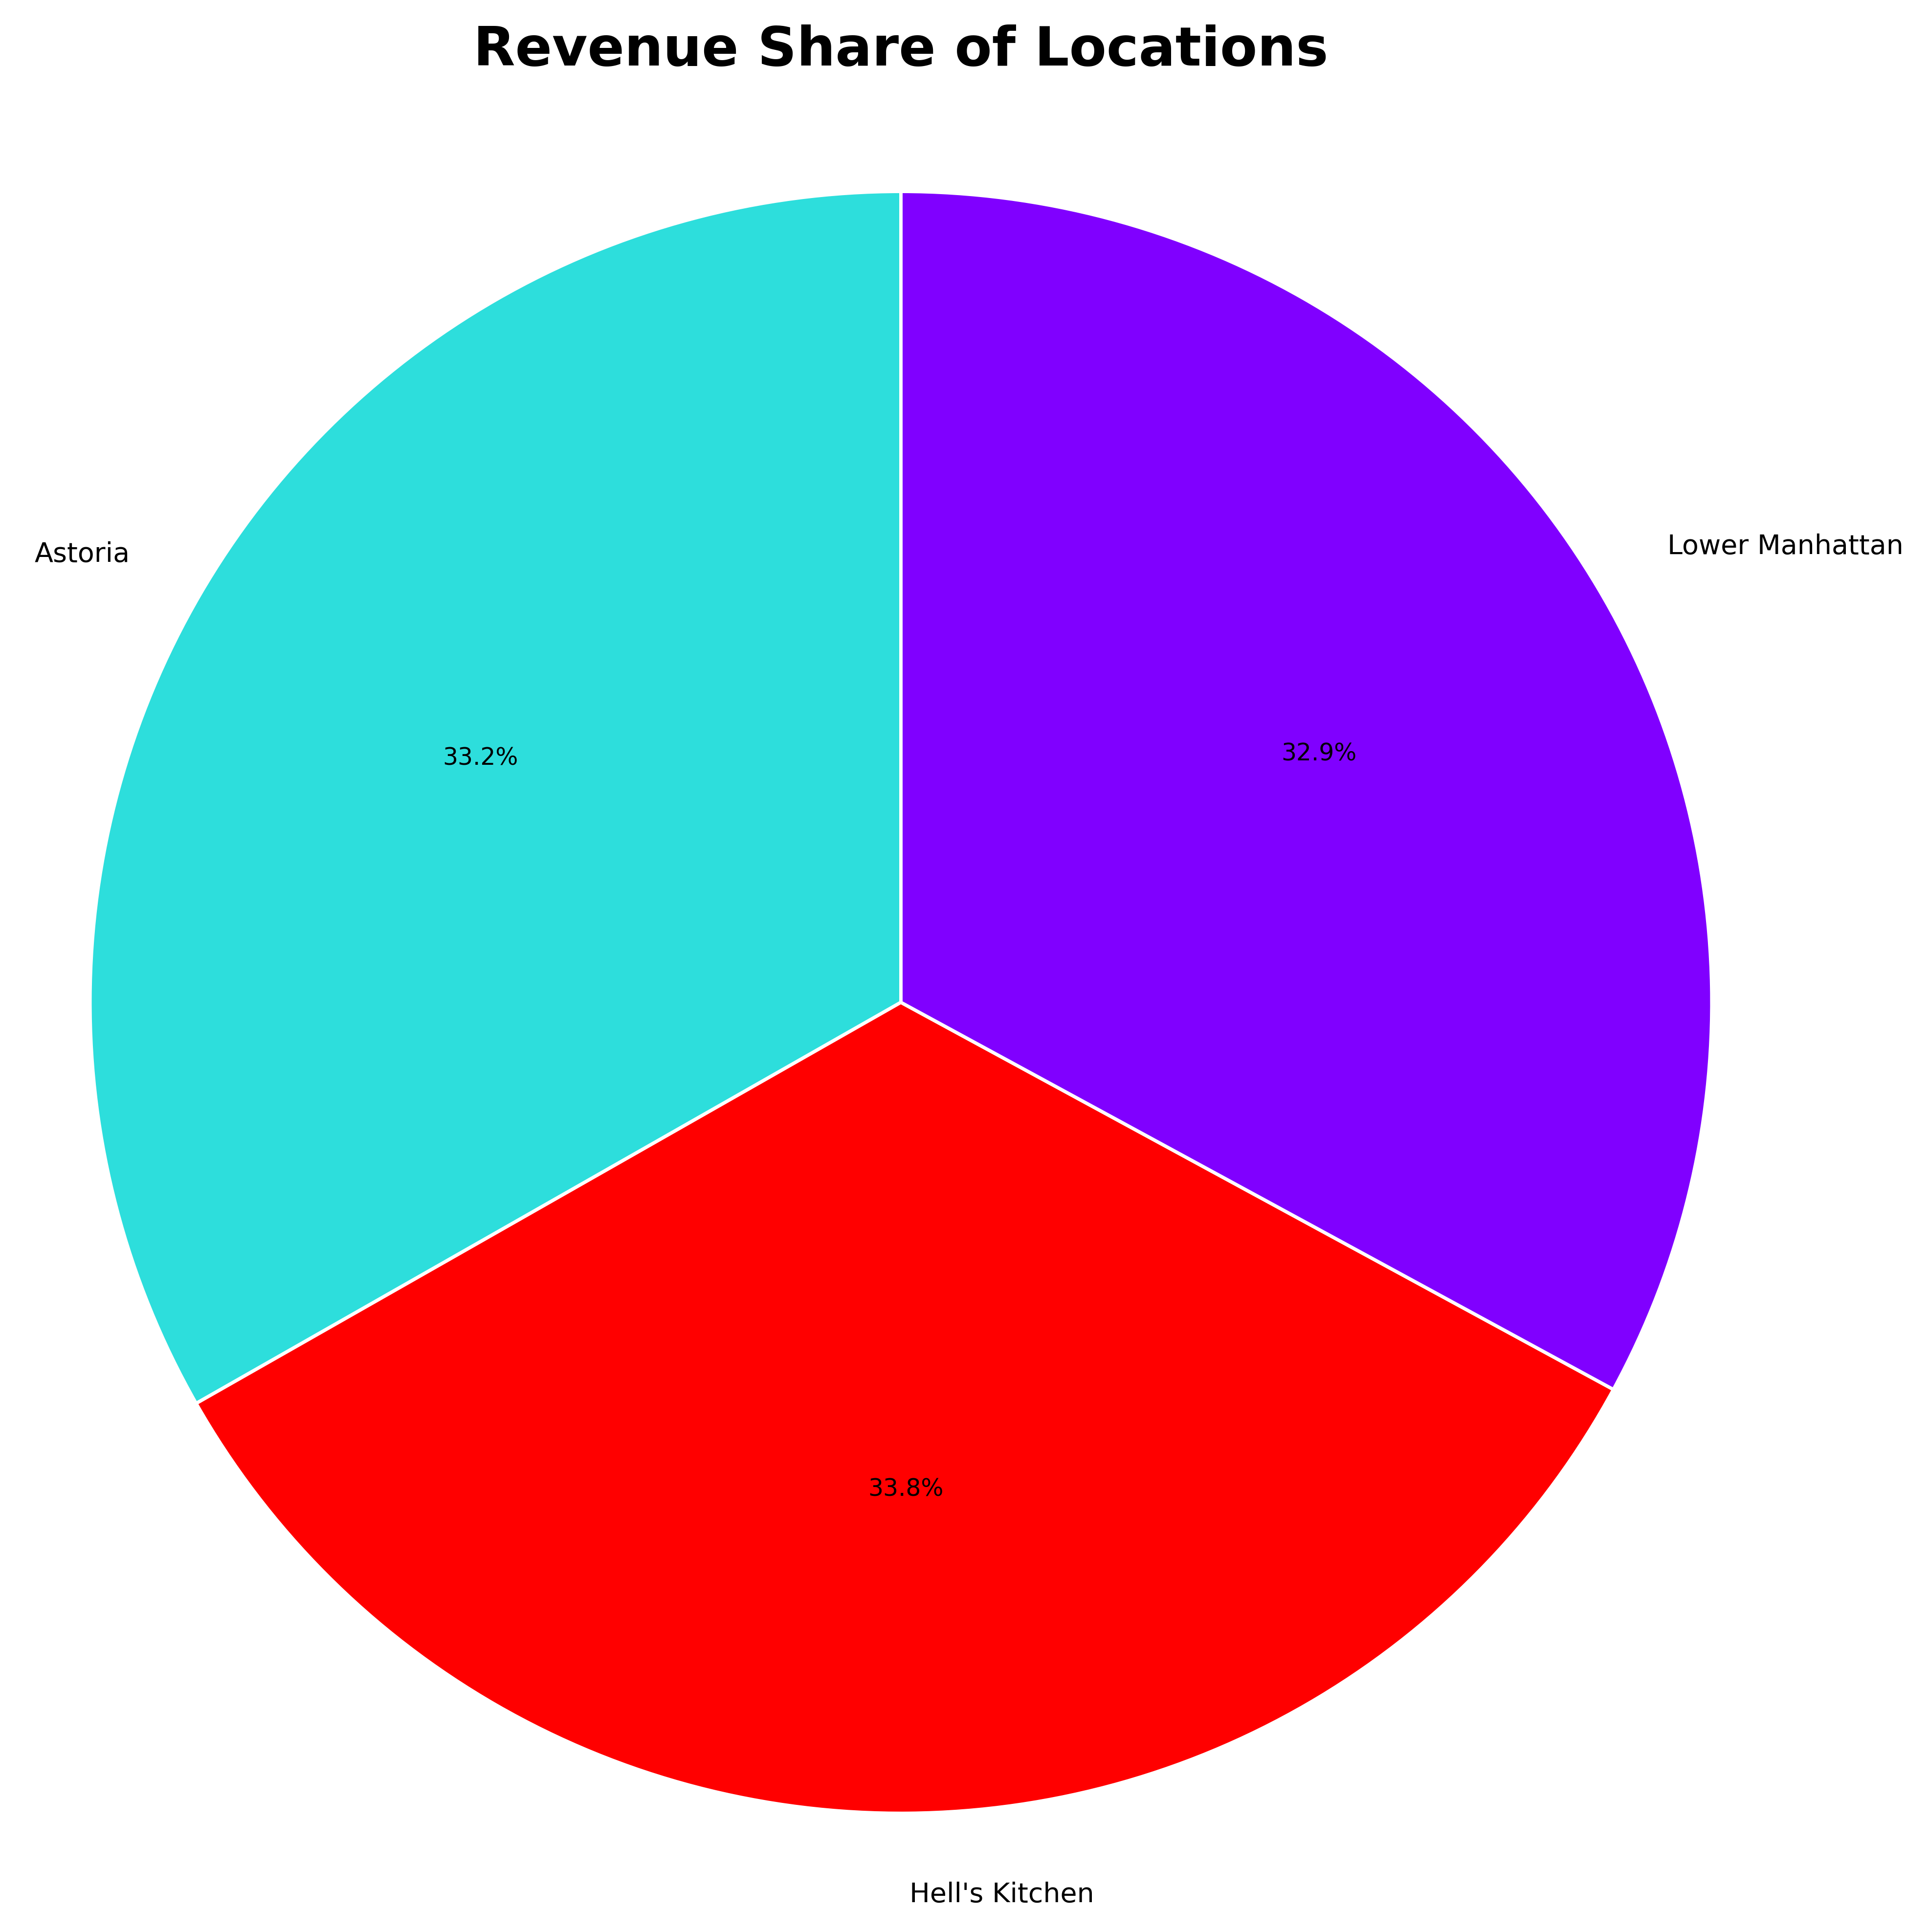

In [ ]:
# Normalize total_sales data for colormap
norm = mcolors.Normalize(
    vmin=np.min(location_revenue['total_revenue']),
    vmax=np.max(location_revenue['total_revenue'])
)
cmap = plt.cm.rainbow
colors = cmap(norm(location_revenue['total_revenue']))

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(8, 8),
    dpi=500,
    facecolor='white',
)

wedges, texts, autotexts = ax.pie(
    x=location_revenue['total_revenue'],
    labels=location_revenue['store_location'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    radius=1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 8, 'color': 'black'},
)

for autotext in autotexts:
    autotext.set_fontsize(7)
    autotext.set_color('black')

ax.set_title(
    "Revenue Share of Locations",
    fontsize=16,
    fontweight='bold',
    color='black',
    loc='center',
    pad=15
)

ax.axis('equal')

fig.tight_layout()
plt.show()


### IV. How is the sales volume distributed throughout the day? When are the busiest hours?

In [37]:
volume_distribution_day = df.groupby(df['time_as_datetime'].dt.hour) \
                            .agg(transcations=('transaction_id', 'count')) \
                            .reset_index()

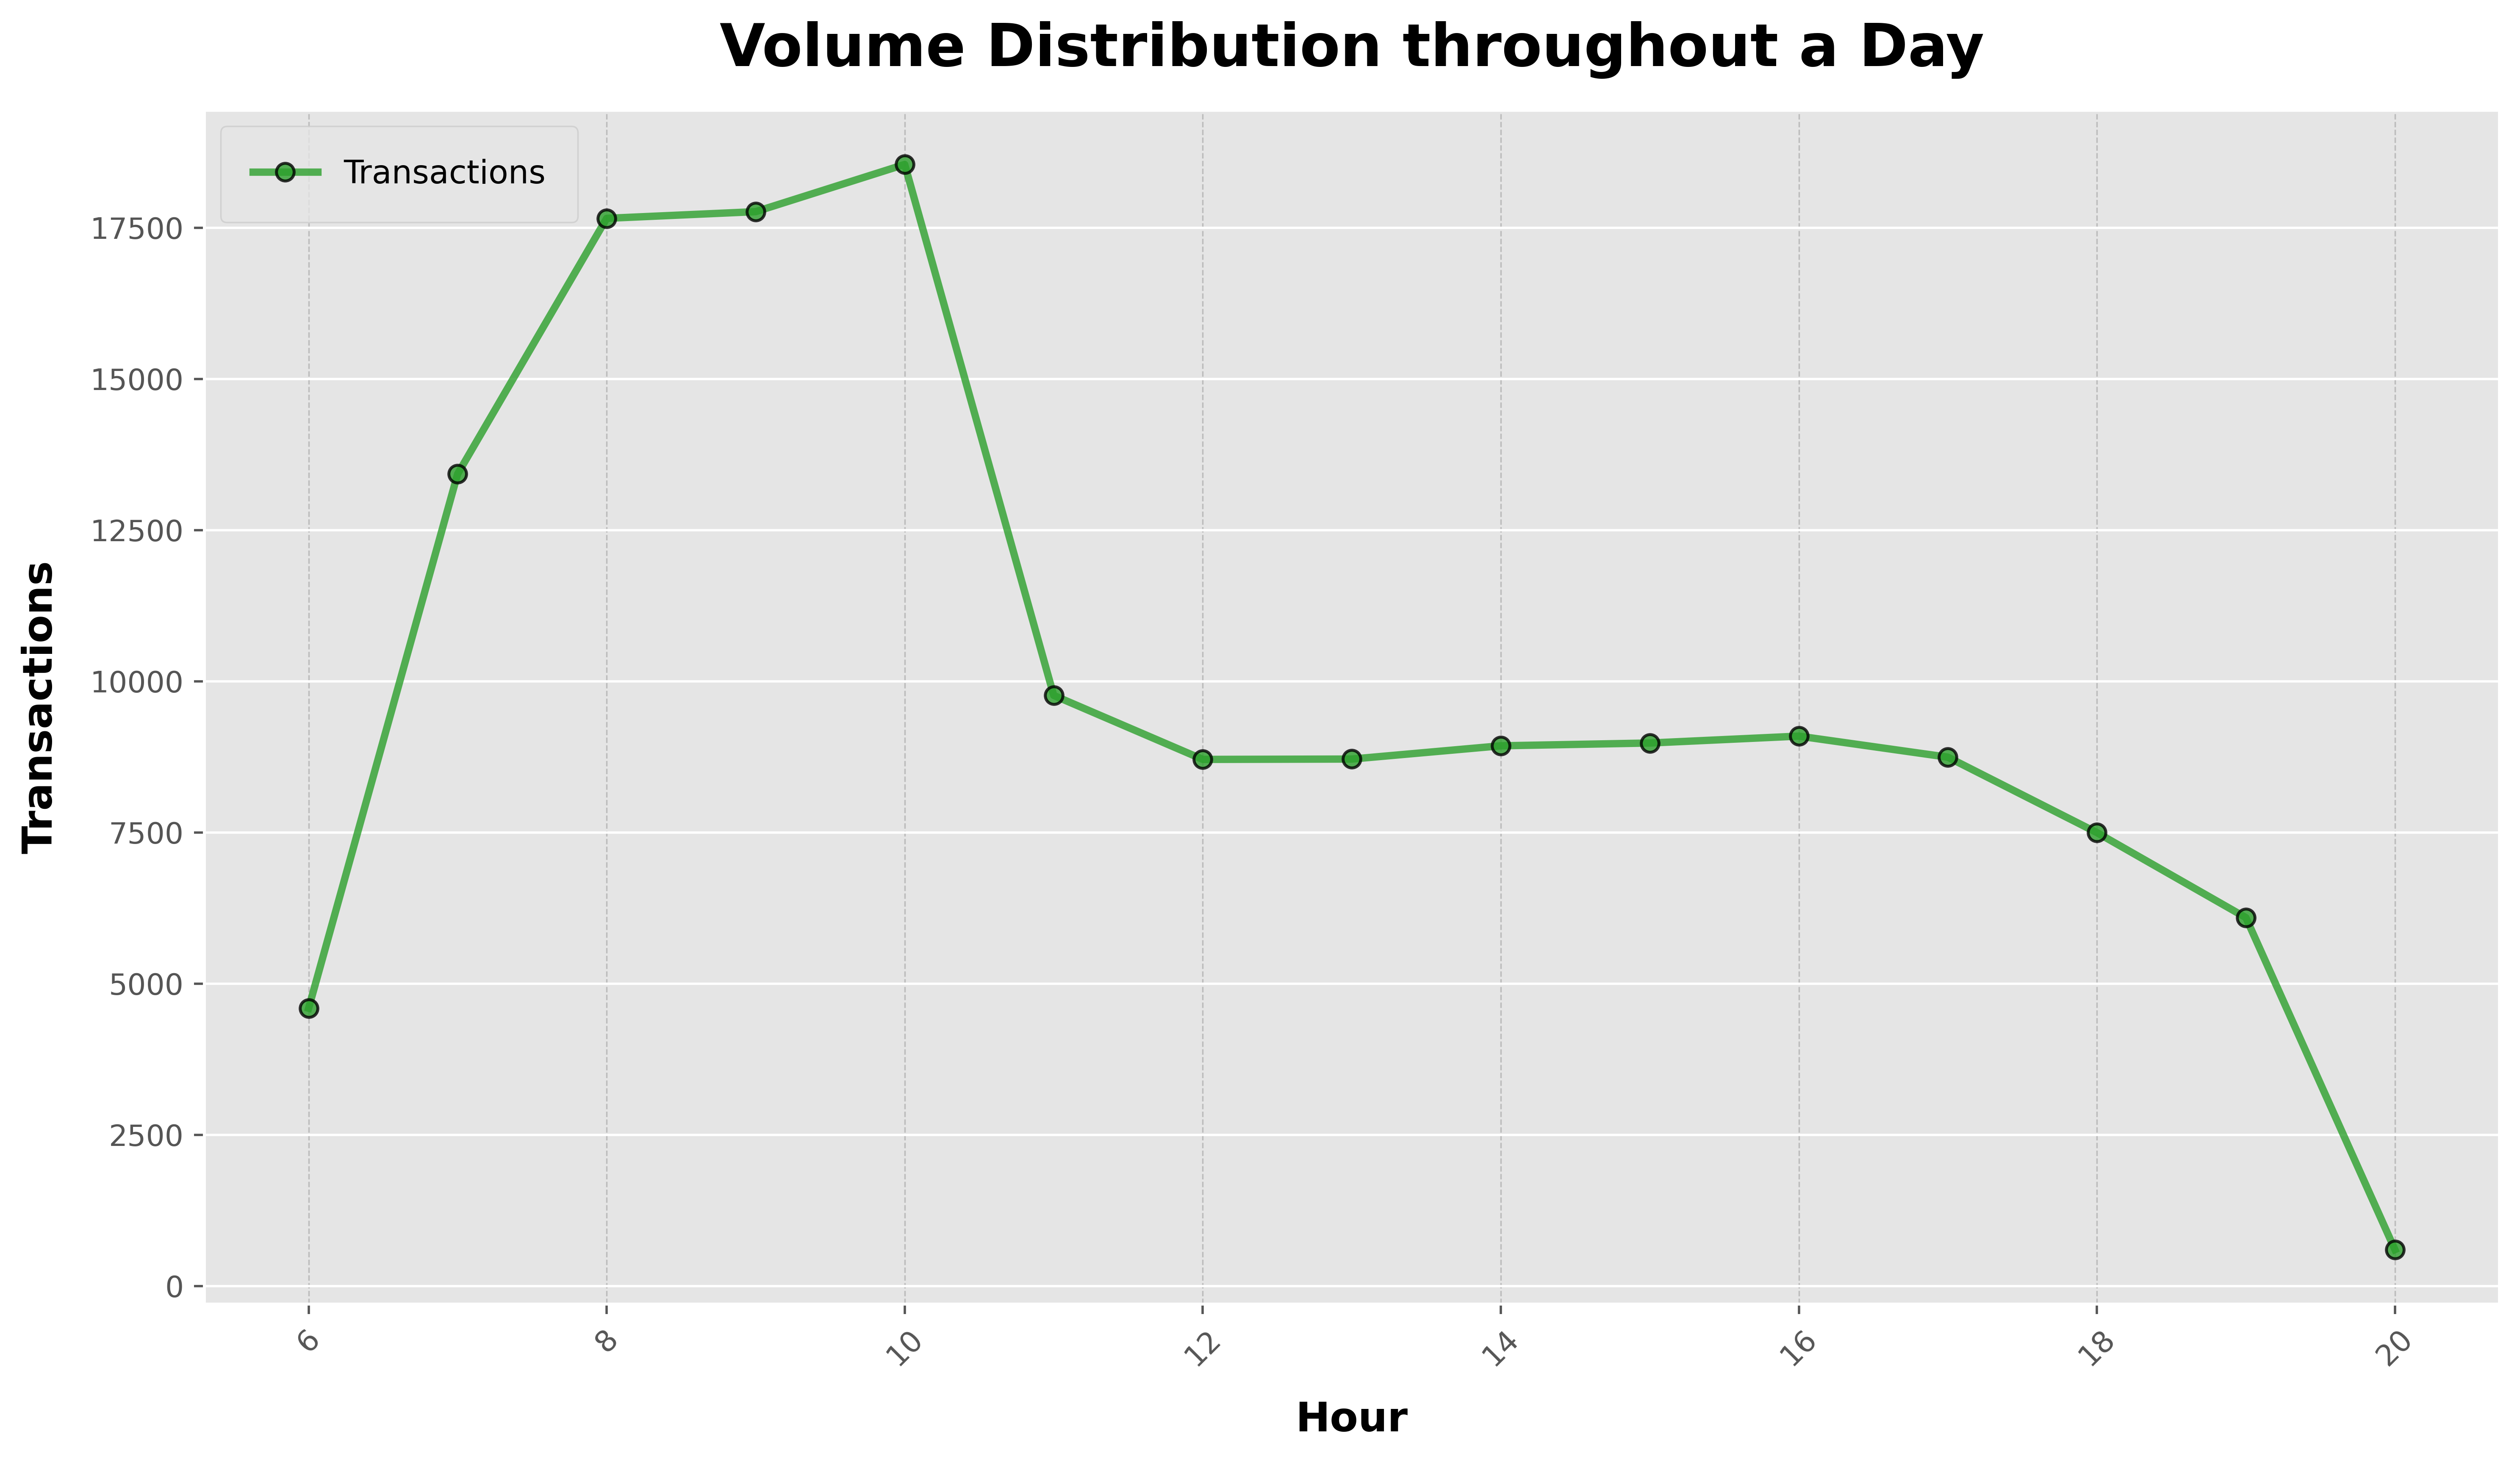

In [76]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(12, 7),
    dpi=500
)

ax.plot(
    volume_distribution_day['time_as_datetime'],
    volume_distribution_day['transcations'],
    color='#2ca02c',                     
    linestyle='-',
    linewidth=2.5,
    marker='o',
    markersize=6,
    markerfacecolor='#2ca02c',
    markeredgecolor='black',
    alpha=0.8,
    label='Transactions'
)

ax.set_title(
    "Volume Distribution throughout a Day",
    fontsize=20,
    fontweight='bold',
    color='black',
    pad=15
)

ax.set_xlabel(
    "Hour",
    fontsize=14,
    fontweight='bold',
    color='black',
    labelpad=10
)

ax.set_ylabel(
    "Transactions",
    fontsize=14,
    fontweight='bold',
    color='black',
    labelpad=10
)

########### Configuring Grid For Each Axis ###########
ax.xaxis.grid(
    visible=True, 
    which='major', 
    color='gray', 
    linestyle='--', 
    linewidth=0.5, 
    alpha=0.4
)
ax.yaxis.grid(
    visible=True, 
    which='minor', 
    color='gray', 
    linestyle='--', 
    linewidth=0.4, 
    alpha=0.3
)

plt.xticks(rotation=45)

########### Configurting Legend ###########
ax.legend(
    fontsize=11,
    loc='upper left',
    frameon=True,
    fancybox=True,
    framealpha=0.8,
    shadow=False,
    borderpad=1
)

plt.tight_layout()
plt.show()

### V. What is the percentage breakdown of sales by product category?

In [61]:
product_categories = df.groupby('product_category') \
                       .agg(total_revenue=('revenue', 'sum')) \
                       .sort_values(by='total_revenue') \
                       .reset_index()

product_categories = product_categories.iloc[3: ]

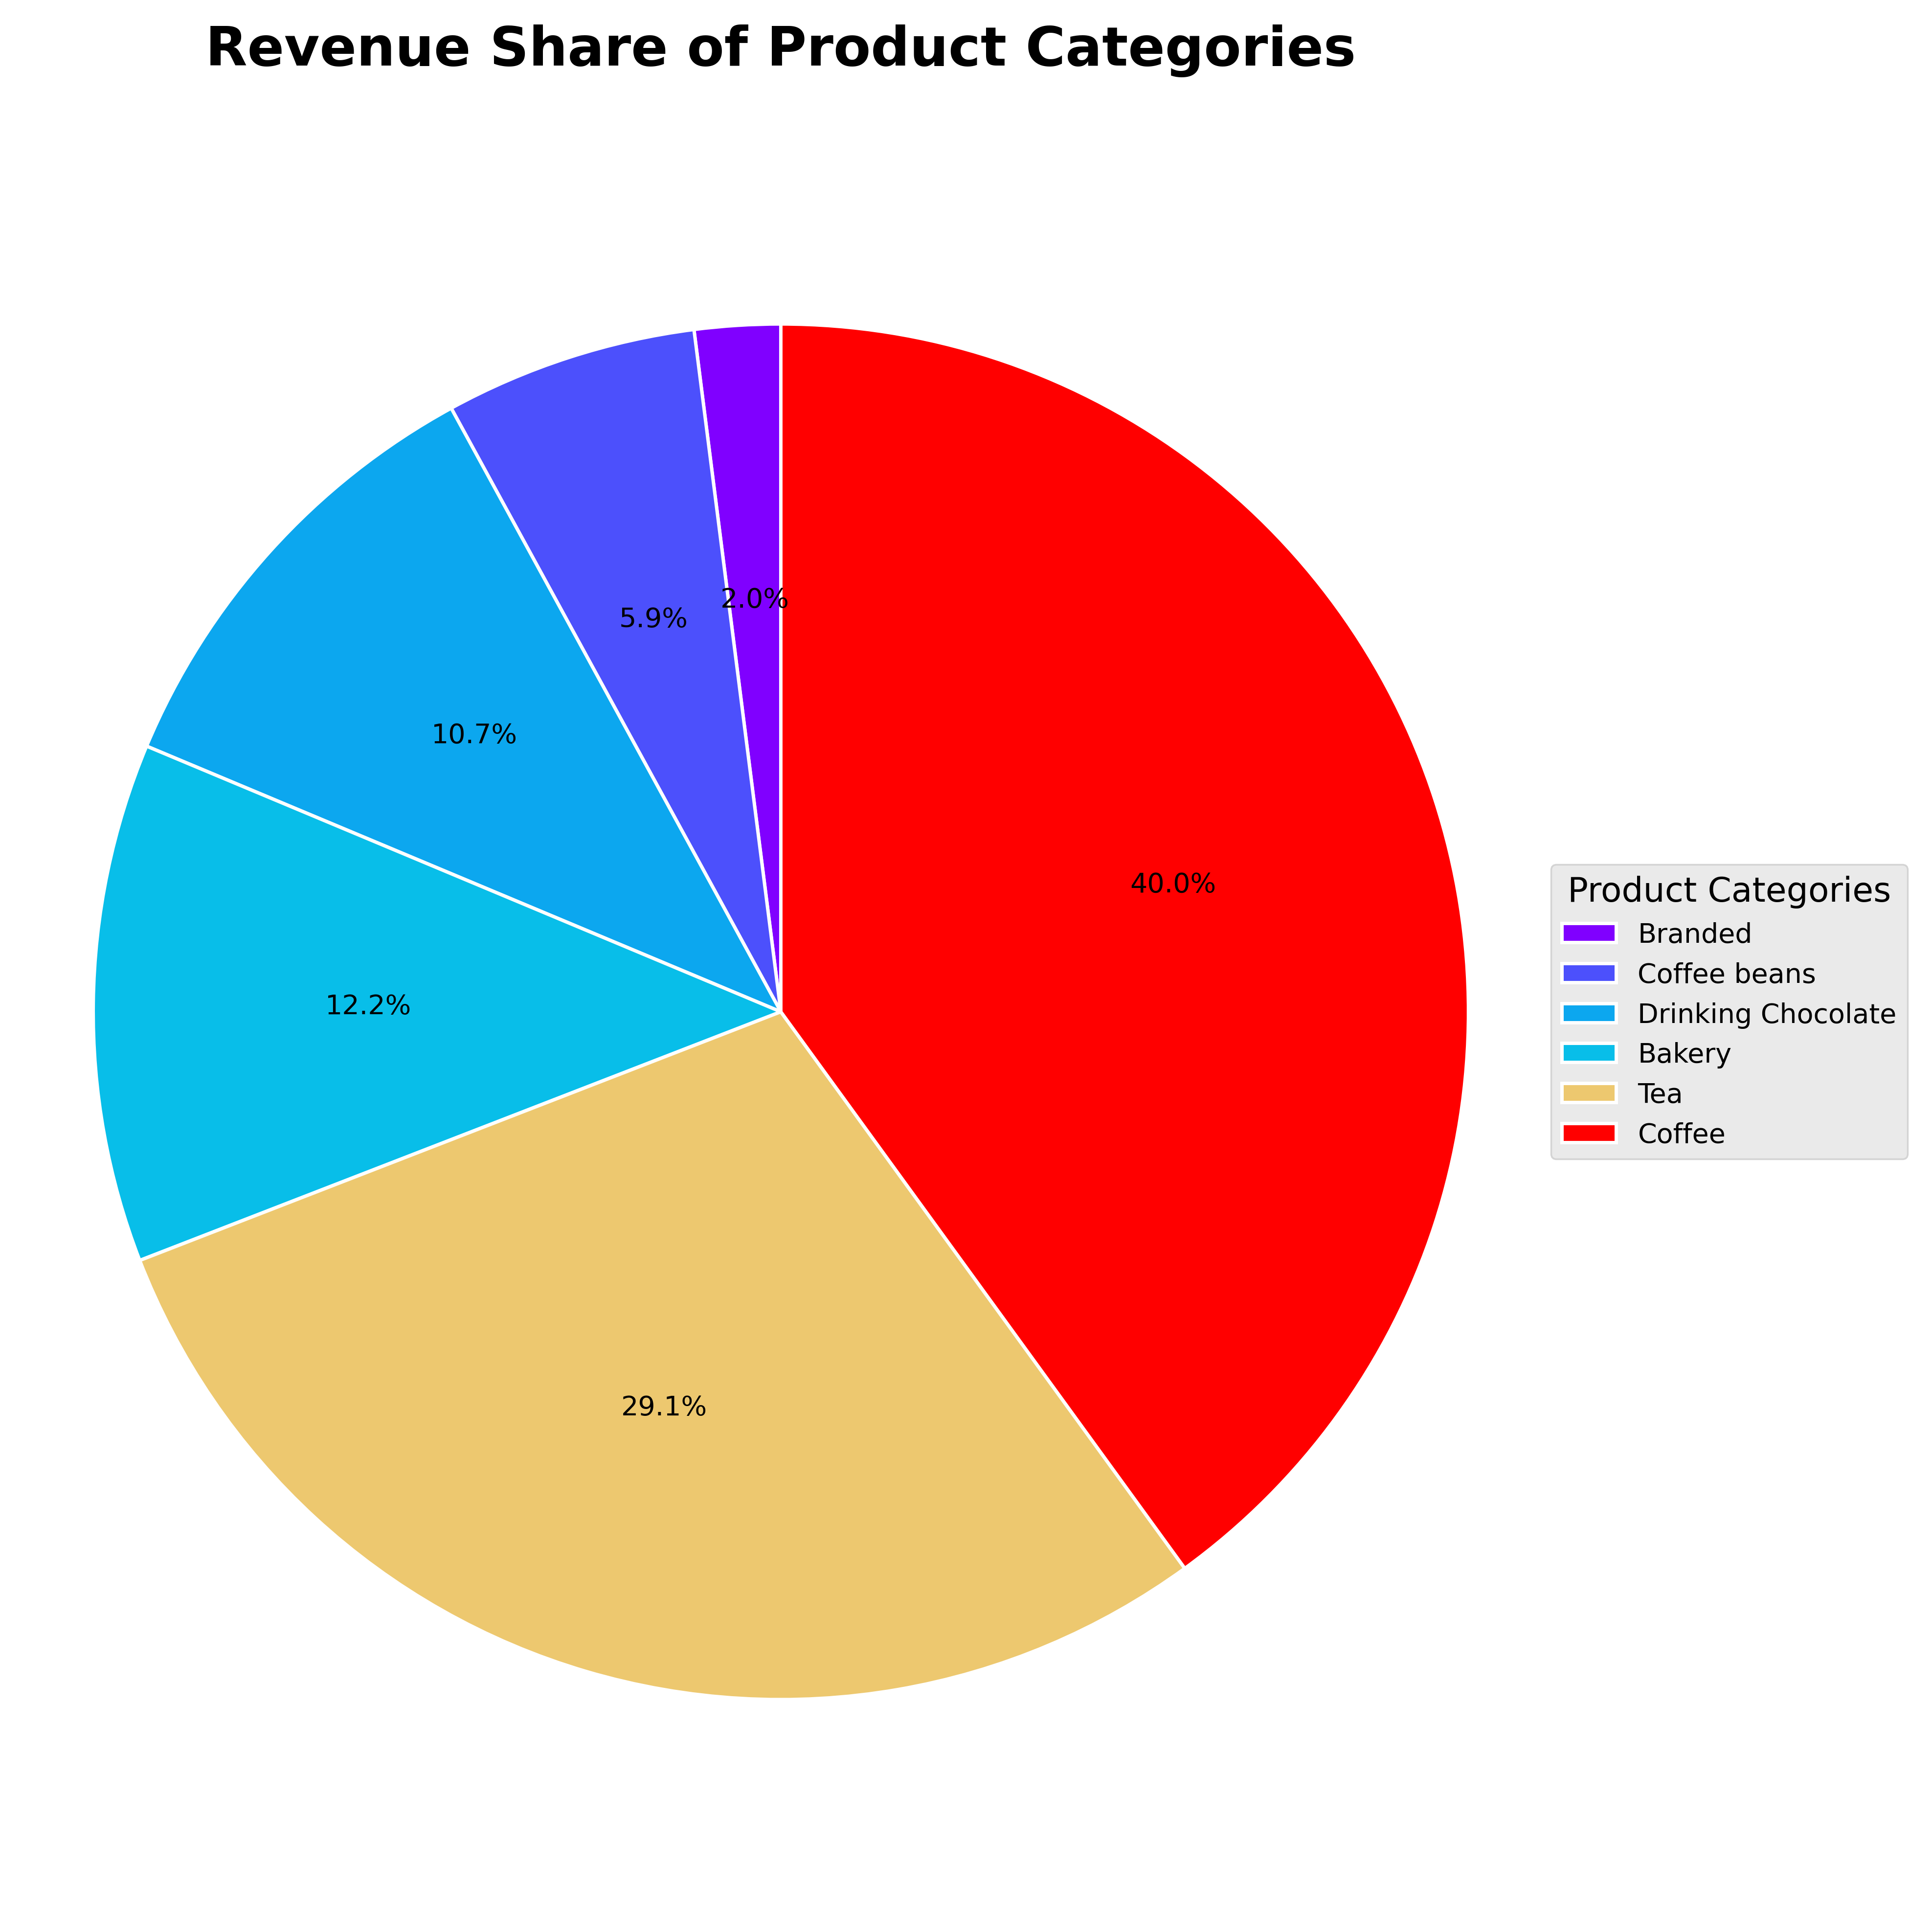

In [62]:
# Normalize total_sales data for colormap
norm = mcolors.Normalize(
    vmin=np.min(product_categories['total_revenue']),
    vmax=np.max(product_categories['total_revenue'])
)
cmap = plt.cm.rainbow
colors = cmap(norm(product_categories['total_revenue']))

fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(8, 8),
    dpi=500,
    facecolor='white',
)

wedges, texts, autotexts = ax.pie(
    x=product_categories['total_revenue'],
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    radius=1,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 8, 'color': 'black'},
)

for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('black')

ax.set_title(
    "Revenue Share of Product Categories",
    fontsize=16,
    fontweight='bold',
    color='black',
    loc='center',
    pad=15
)

ax.legend(
    labels=product_categories['product_category'],
    title='Product Categories',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=8
)
ax.axis('equal')

fig.tight_layout()
plt.show()

### VI. Which store location has the highest number of individual customer transactions?

In [63]:
df.head()

,transaction_id,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,time_as_datetime,revenue,day,month
0,1,2023-01-01,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,1900-01-01 07:06:11,6.0,1,1
1,2,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1900-01-01 07:08:56,6.2,1,1
2,3,2023-01-01,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1900-01-01 07:14:04,9.0,1,1
3,4,2023-01-01,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1900-01-01 07:20:24,2.0,1,1
4,5,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1900-01-01 07:22:41,6.2,1,1


In [66]:
location_transactions = df.groupby('store_location') \
                          .agg(transactions=('transaction_id', 'count')) \
                          .reset_index()

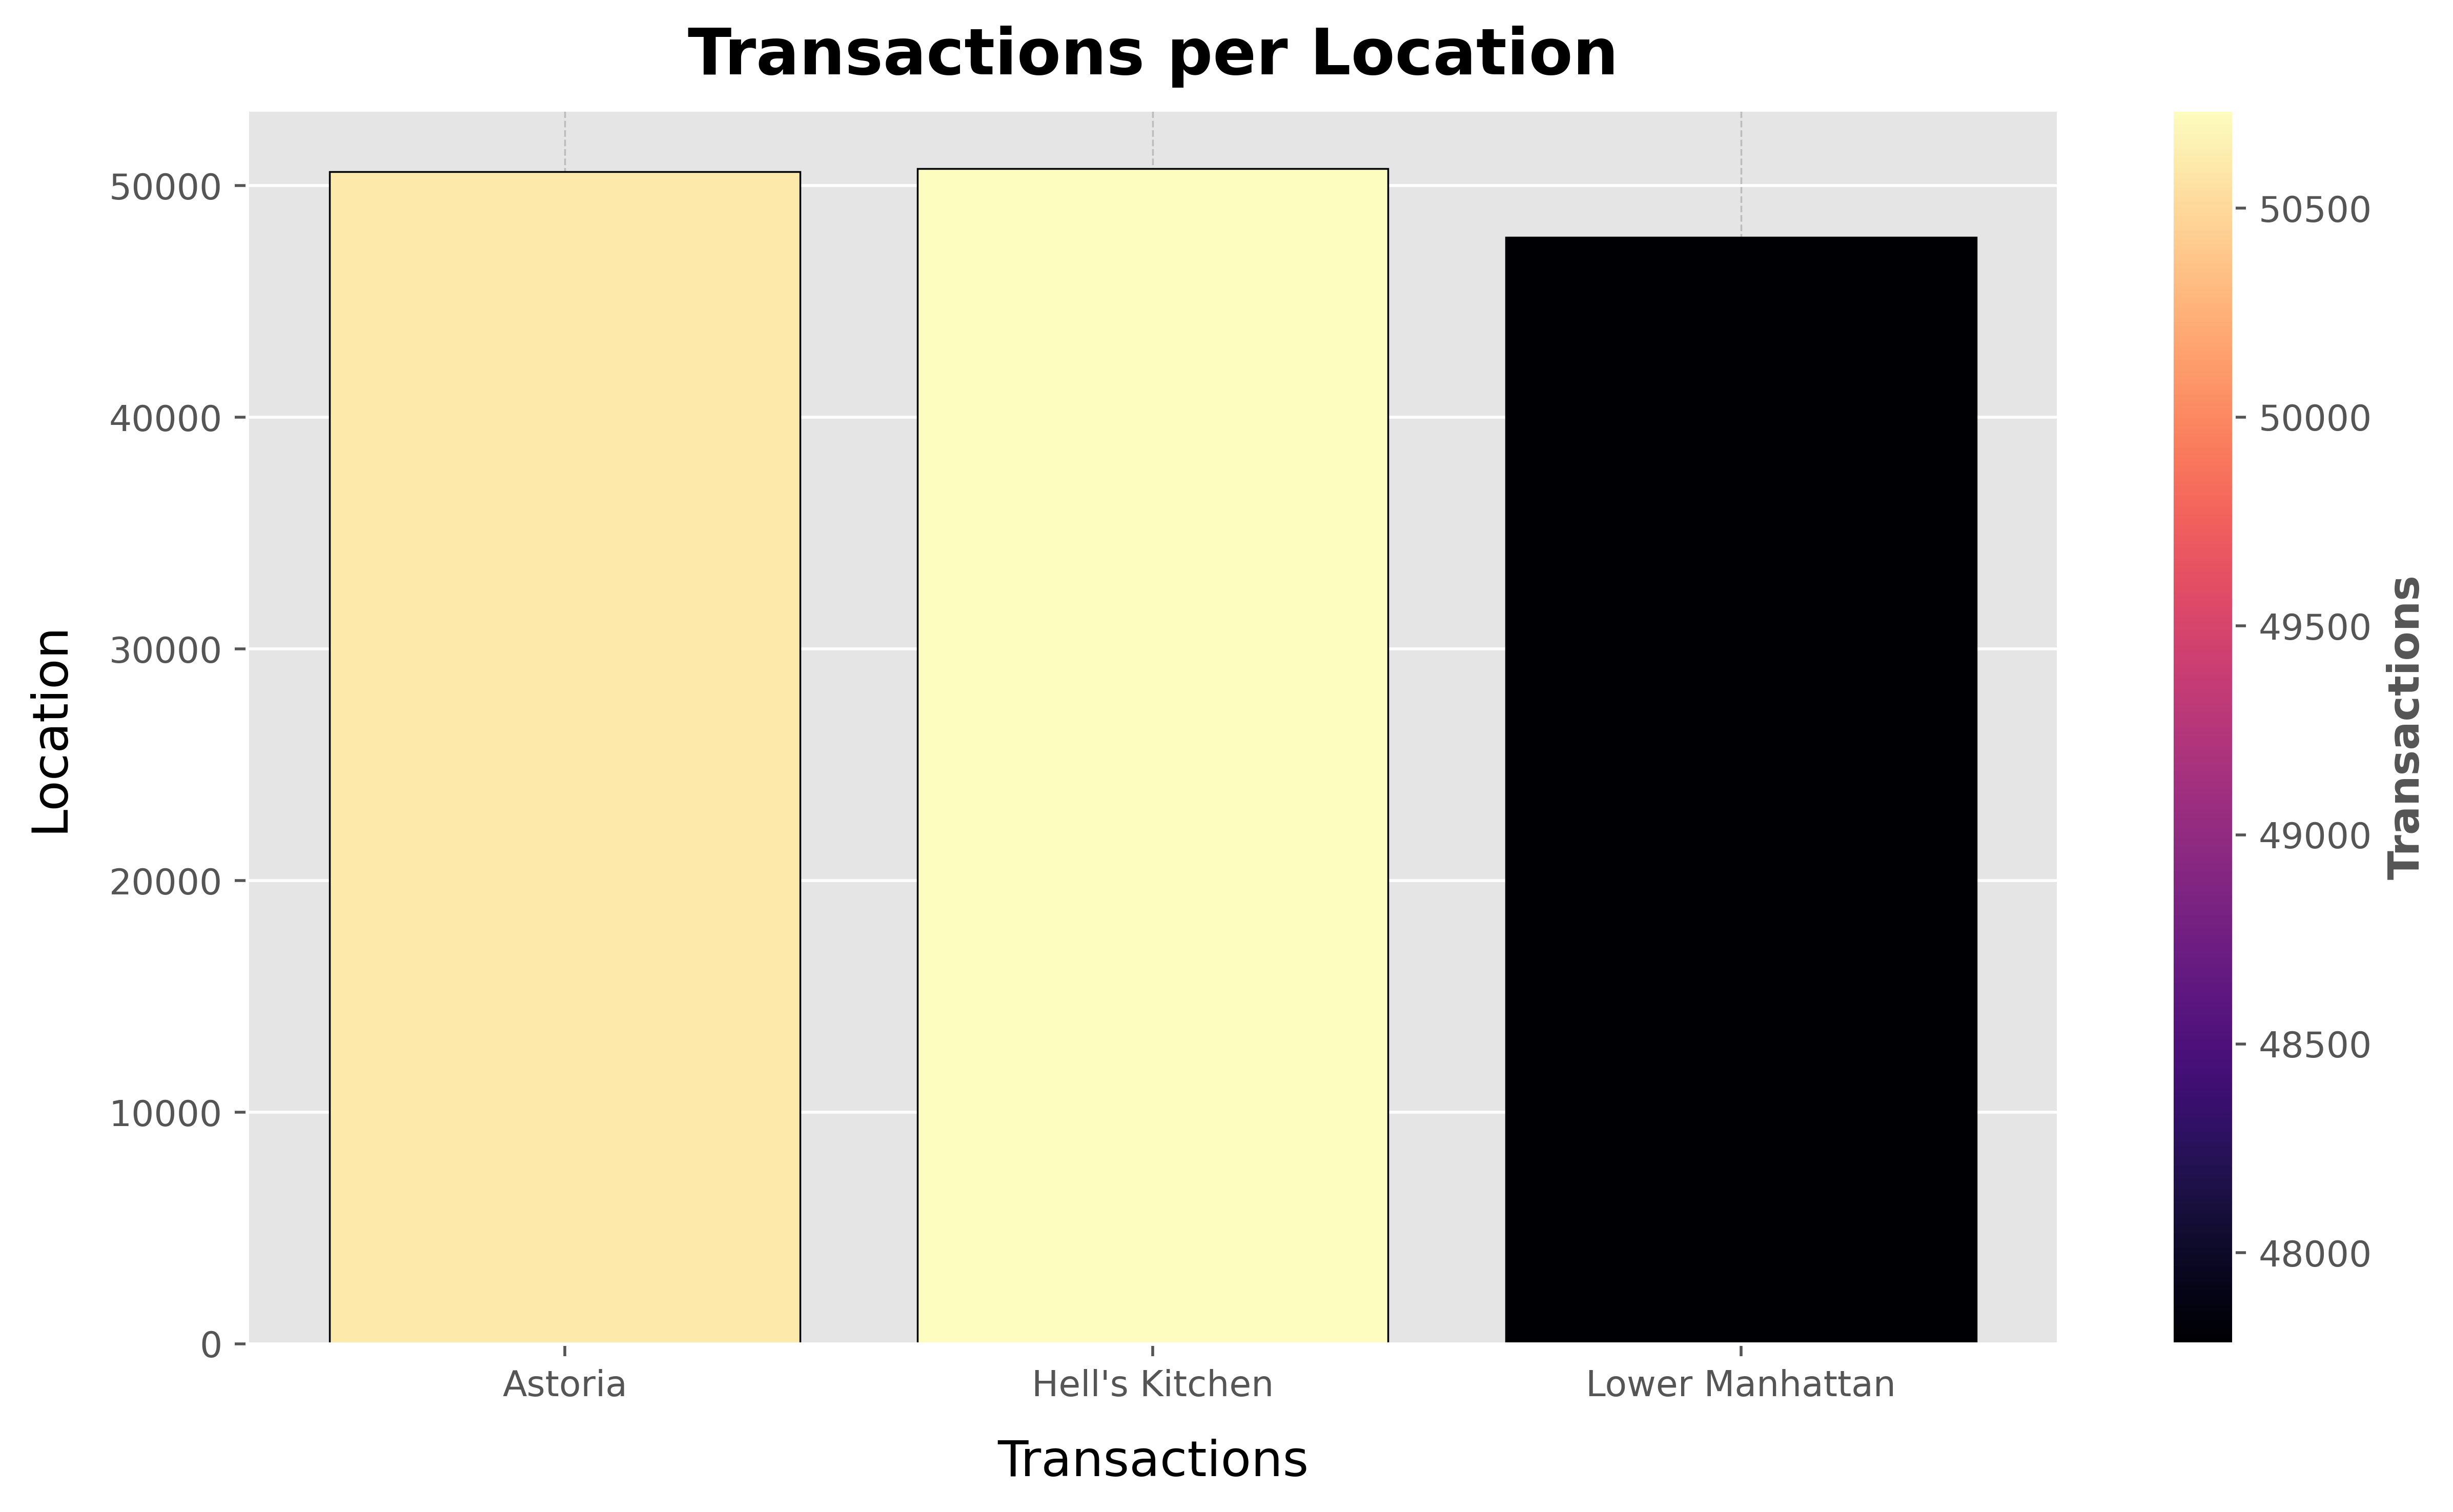

In [69]:
# Normalizing the data for colormap (0 to 1)
norm = mcolors.Normalize(
    vmin=location_transactions['transactions'].min(),
    vmax=location_transactions['transactions'].max()
)
cmap = plt.cm.magma
colors = cmap(norm(location_transactions['transactions']))

fig, ax = plt.subplots(
    figsize=(10, 6),
    dpi=500,
)

ax.bar(
    x=location_transactions['store_location'],
    height=location_transactions['transactions'],
    color=colors,
    edgecolor='black'
)

ax.set_title(
    label='Transactions per Location',
    fontsize=18,
    fontweight='bold',
    color='black',
    loc='center',
    pad=10
)

ax.set_xlabel(
    xlabel='Transactions',
    fontsize=14,
    color='black',
    labelpad=10,
    loc='center'
)

ax.set_ylabel(
    ylabel='Location',
    fontsize=14,
    color='black',
    labelpad=10,
    loc='center'
)


########### Configuring Grid For Each Axis ###########
ax.xaxis.grid(
    visible=True, 
    which='major', 
    color='gray', 
    linestyle='--', 
    linewidth=0.5, 
    alpha=0.4
)
ax.yaxis.grid(
    visible=True, 
    which='minor', 
    color='gray', 
    linestyle='--', 
    linewidth=0.4, 
    alpha=0.3
)

# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(
    label='Transactions',
    fontsize=12,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

### VII. Rivalry Between Product Types

In [75]:
product_types = df['product_type'].unique()

In [79]:
rivarly_types = df.groupby(['product_type', 'month']) \
                  .agg(revenue=('revenue', 'sum')) \
                  .reset_index()

rivarly_types.head()

,product_type,month,revenue
0,Barista Espresso,1,10461.20
1,Barista Espresso,2,10027.15
2,Barista Espresso,3,13078.20
3,Barista Espresso,4,15555.90
4,Barista Espresso,5,20423.75


In [106]:
def plot_lines(types: list):
    fig, ax = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(12, 7),
        dpi=500
    )
    
    # Using a 10-color palette, because max number of possible user types is 10
    color_map = plt.get_cmap('tab10')
    type_to_color = {t: color_map(i % 10) for i, t in enumerate(types)}

    for type in types:
        extract = rivarly_types[rivarly_types['product_type'] == type]
        ax.plot(
            extract['month'],
            extract['revenue'],
            color=type_to_color[type],            
            linestyle='-',
            linewidth=2.5,
            marker='o',
            markersize=6,
            markerfacecolor=type_to_color[type],
            markeredgecolor='black',
            alpha=0.8,
            label=type
        )

    ax.set_title(
        "Rivalry Between Various Product Types",
        fontsize=20,
        fontweight='bold',
        color='black',
        pad=15
    )

    ax.set_xlabel(
        "Month",
        fontsize=14,
        fontweight='bold',
        color='black',
        labelpad=10
    )

    ax.set_ylabel(
        "Revenue",
        fontsize=14,
        fontweight='bold',
        color='black',
        labelpad=10
    )

    ########### Configuring Grid For Each Axis ###########
    ax.xaxis.grid(
        visible=True, 
        which='major', 
        color='gray', 
        linestyle='--', 
        linewidth=0.5, 
        alpha=0.4
    )
    ax.yaxis.grid(
        visible=True, 
        which='minor', 
        color='gray', 
        linestyle='--', 
        linewidth=0.4, 
        alpha=0.3
    )

    plt.xticks(rotation=45)

    ########### Configurting Legend ###########
    ax.legend(
        fontsize=11,
        loc='upper left',
        frameon=True,
        fancybox=True,
        framealpha=0.8,
        shadow=False,
        borderpad=1
    )

    plt.tight_layout()
    plt.show()

In [107]:
def choose_randomly(sequence: list, amount=5):
    working_sequence = list(sequence)
    result = []
    for tries in range(amount):
        random_choice = rn.choice(working_sequence)
        result.append(random_choice)
        working_sequence.remove(random_choice)
    
    return result

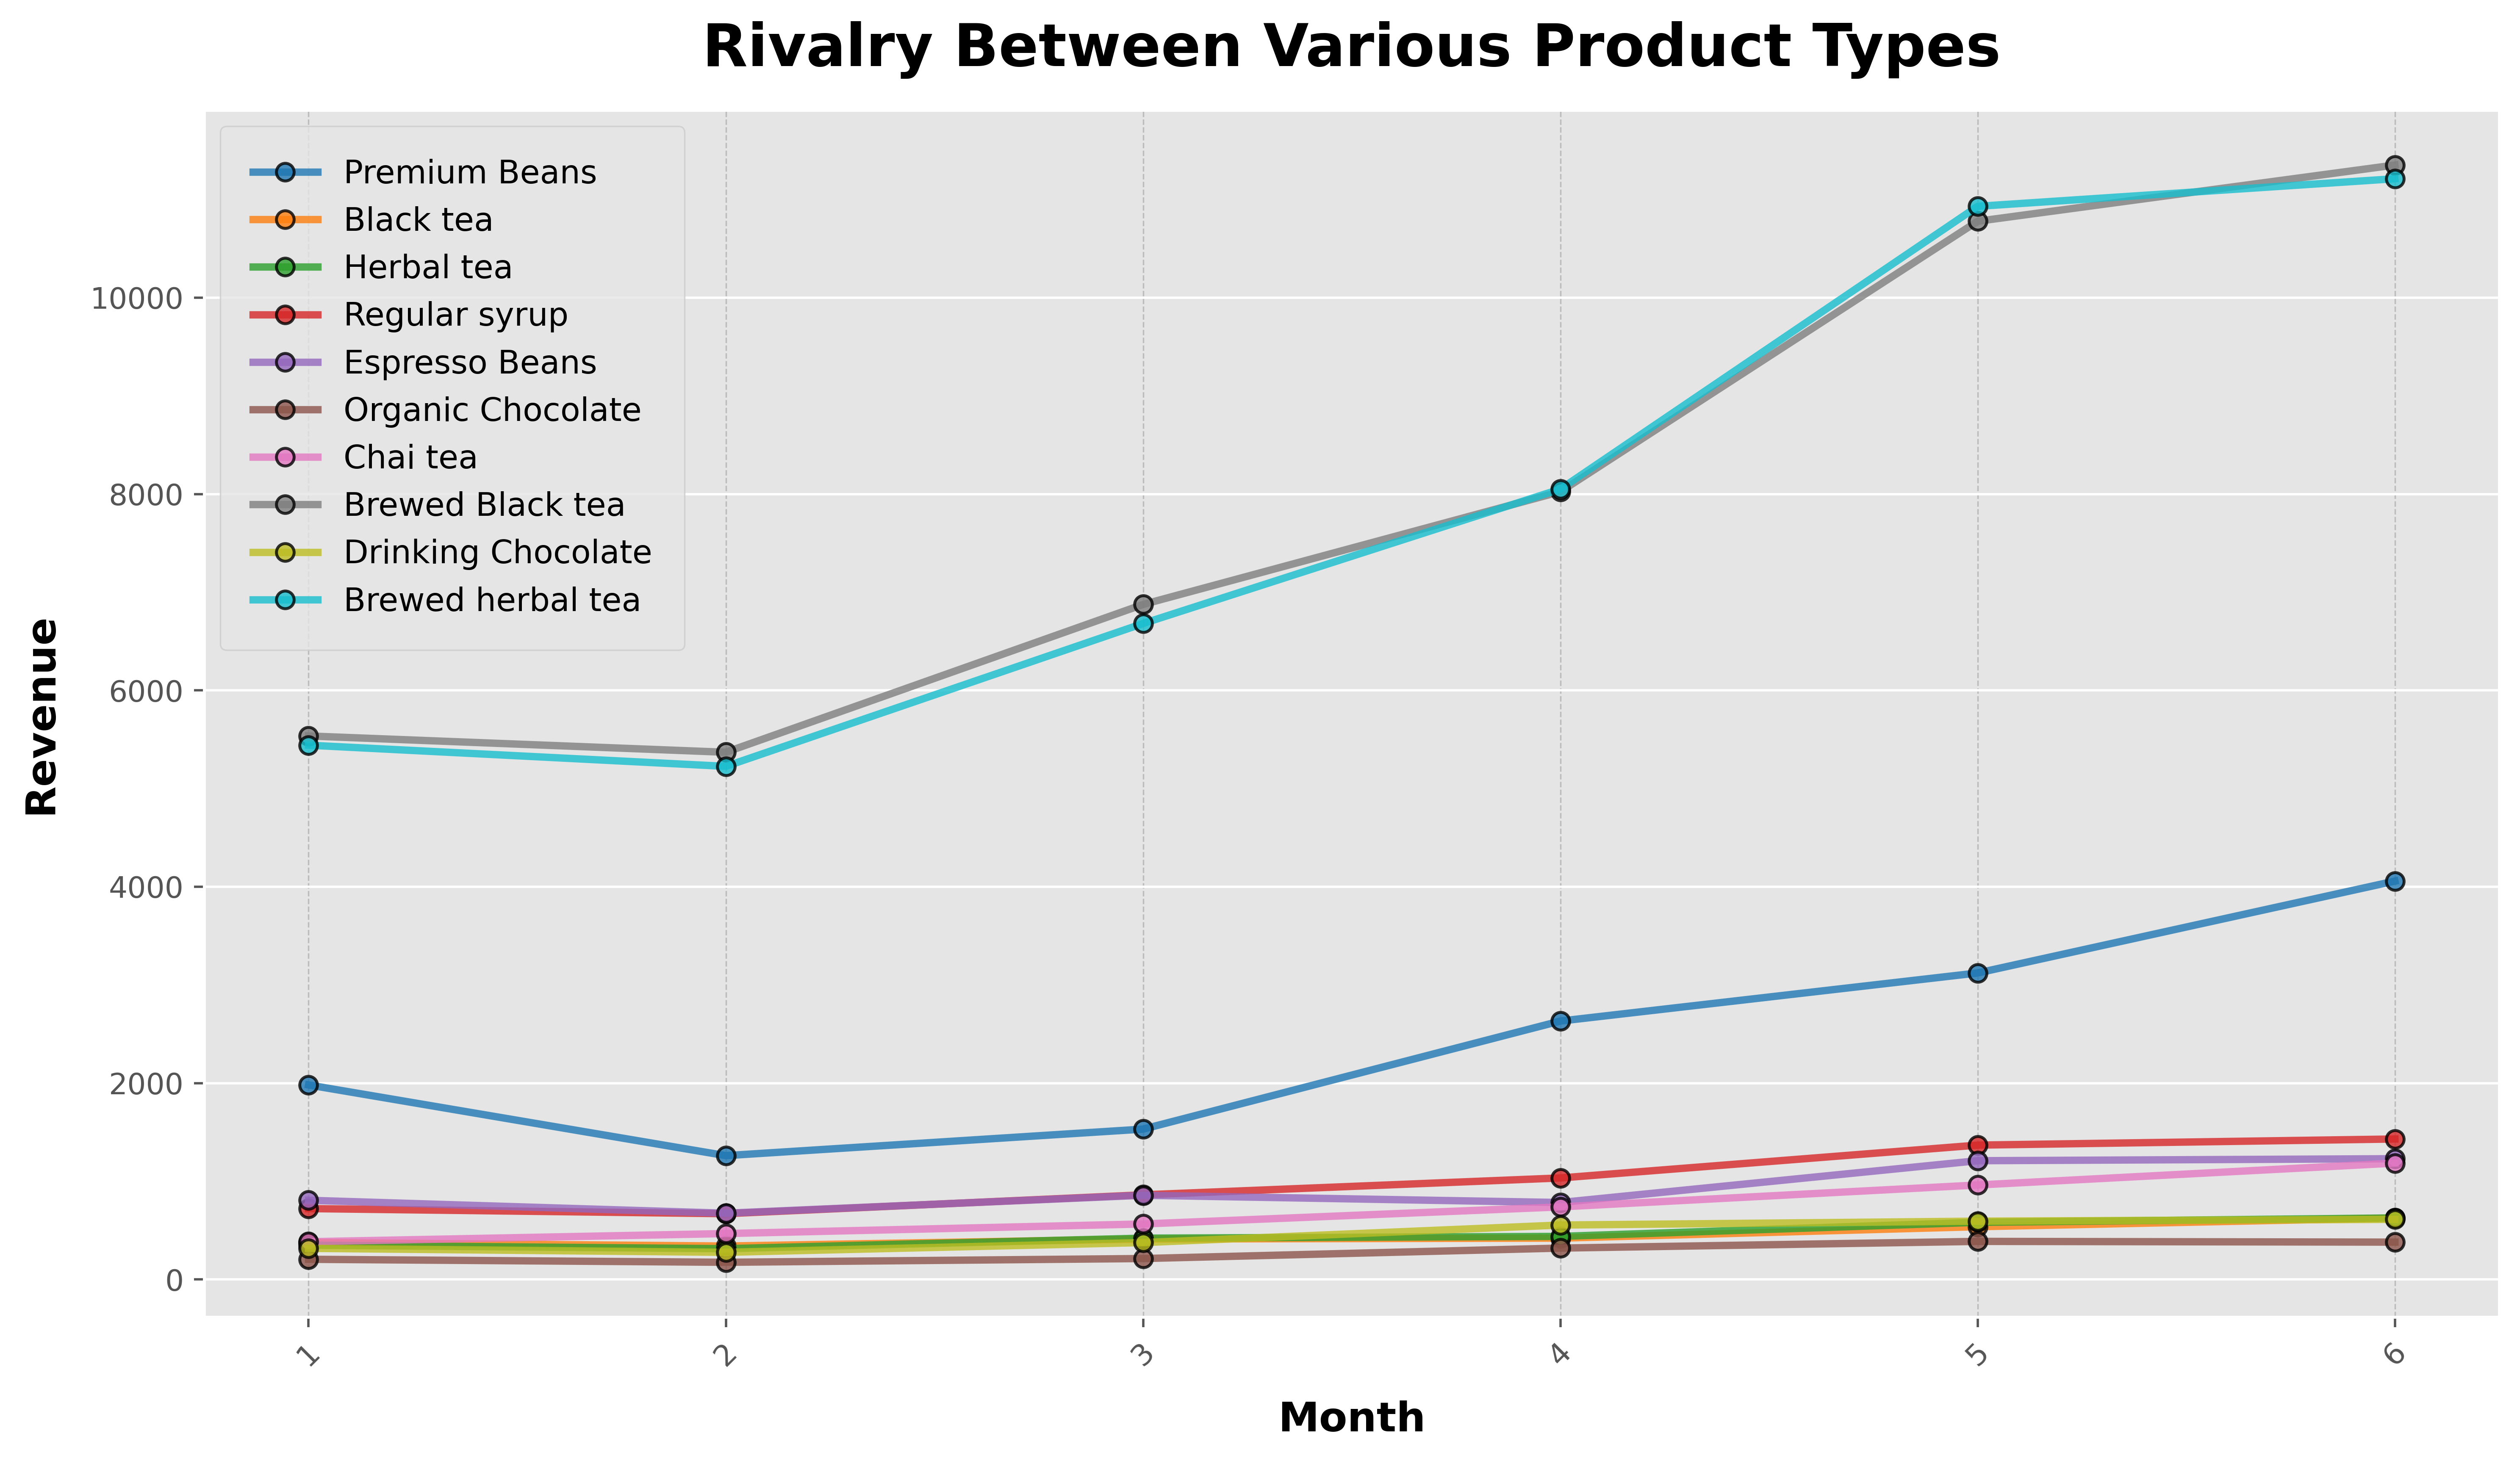

In [108]:
plot_lines(choose_randomly(sequence=product_types, amount=10))